Latihan:   
* https://www.kaggle.com/jessemostipak/hotel-booking-demand    
* https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists  
* https://www.kaggle.com/blastchar/telco-customer-churn

Pilih salah satu dari dataset di atas:  
* Lakukan EDA singkat sebagai basis dari skema preprocessing kalian  
* Tentukan metric evaluasi sesuai dengan tujuan bisnis kalian. --> Recall (menekan jumlah FN)
* Pilih model terbaik dari model klasifikasi yang sudah kita pelajari (dt, knn, logreg, ensemble)
* Optimasi model yang kalian pilih (hyperparameter tunning, kalau dataset imbalance, bisa pakai balancing method)

Kirim ke Brigita.gems@gmail.com.


Steps:  
pelajari data, EDA, skema preprocessing, buat transformer, pilih model yang mau dipakai utk coba:  
kl regresi -> coba linear regresi, kl memenuhi asumsi bisa masuk lasso and ridge untuk bantu milih feature dan handle ..  
kl ga memenuhi coba pakai non parametrik(logreg, KNN, DT, RR  
kl ga puas baru ke boosting,  
splitting data (train dan test)  
cross validasi untuk model benchmark (mean,std) bisa pilih 1 atau 2  
hyperparameter tunning --> dapat model final   
cek lagi model propertiesnya   
lakukan feature selection lagi --> feture yang ga kepakai bisa di drop   
cek lagi apakah hasilnya turun atau tidak  
(kl hasil hyperparameter tunning ga memuaskan bisa coba model yang belum dicoba)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data : Telco Customer Churn

In [2]:
pd.set_option('display.max_column', None)

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.replace(' ',np.nan).isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)

In [7]:
df[df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
# dari data totalcharge = NaN, terlihat semua tenure = 0, artinya pelanggan baru/belum ada 1 bulan berlangganan
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

## Missing Value

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [10]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


## Check imbalance data

In [13]:
df['Churn'].value_counts()/len(df)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

# Preprocessing

In [14]:
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler

In [15]:
df.describe(include=object)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,9522-BNTHX,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [16]:
for i in df.dtypes[df.dtypes==object].index:
    print(i, df[i].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


## Scheme

C:\Users\algustie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\algustie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\algustie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

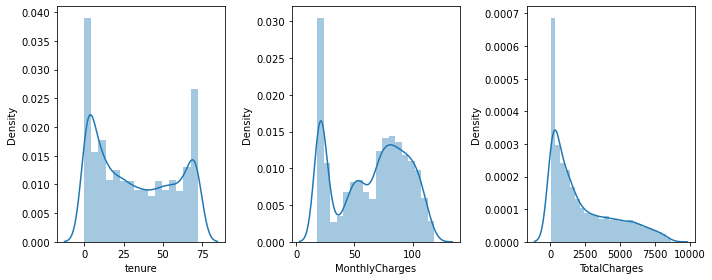

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(131)
sns.distplot(df['tenure'])

plt.subplot(132)
sns.distplot(df['MonthlyCharges'])

plt.subplot(133)
sns.distplot(df['TotalCharges'])
plt.tight_layout() #dari kondisi grafik distribusi, ditentukan menggunakan robustscaller

In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

* Robust scaller = 'tenure', 'MonthlyCharges', 'TotalCharges'
* One hot encoding = 'gender', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'
* Ordinal encoding = 'Contract'
* no treatment = 'SeniorCitizen'

In [19]:
ordinal_mapping = [
    {'col':'Contract',
    'mapping':{None:0,'Month-to-month':1,'One year':2,'Two year':3}}
]

In [20]:
df = df.drop(columns='customerID') #drop karena customer ID unique

In [82]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['gender', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']),
    ('ordinal', ce.OrdinalEncoder(mapping=ordinal_mapping), ['Contract']),
    ('robust', RobustScaler(), ['tenure', 'MonthlyCharges', 'TotalCharges'])
], remainder='passthrough')

# Data Splitting

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = df.drop(columns='Churn')
y = np.where(df['Churn']=='Yes',1,0)

In [24]:
y.sum()

1869

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   stratify=y,
                                                    test_size=0.2,
                                                   random_state=20)

In [26]:
x_test.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [27]:
x_train_preprocessed= pd.DataFrame(transformer.fit_transform(x_train))
x_test_preprocessed= pd.DataFrame(transformer.transform(x_test))

# Benchmark

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report

In [30]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=20)
pipe_tree = Pipeline([
    ('preprocess', transformer),
    ('model', tree)
])

In [31]:
model_cv = cross_val_score(pipe_tree, x_train, y_train, scoring='recall')

In [32]:
print(model_cv)
print(model_cv.mean())
print(model_cv.std())

[0.35117057 0.39799331 0.33444816 0.3812709  0.4180602 ]
0.3765886287625418
0.03040352689595589


In [33]:
logreg= LogisticRegression(random_state=20)
knn= KNeighborsClassifier()
tree= DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=20)

In [37]:
models = [logreg, knn, tree]
rata = []
score = []
std = []
for i in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', i)  
    ])
    model_cv = cross_val_score(estimator, x_train, y_train, cv=skfold, scoring='recall')
    rata.append(model_cv.mean())
    score.append(model_cv)
    std.append(model_cv.std())

C:\Users\algustie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\algustie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [38]:
pd.DataFrame({
    'model':['logreg','KNN','tree'],
    'score':score,
    'mean':rata,
    'std':std
})

,model,score,mean,std
0,logreg,"[0.4882943143812709, 0.5217391304347826, 0.494...",0.521070,0.027934
1,KNN,"[0.5050167224080268, 0.5719063545150501, 0.545...",0.547826,0.023113
2,tree,"[0.3511705685618729, 0.3979933110367893, 0.334...",0.376589,0.030404


_dari hasil cross validasi, KNN memiliki performa rata-rata yang lebih tinggi dan lebih stabil_

# Model Performance in Test Set

In [39]:
knn= KNeighborsClassifier()
estimator = Pipeline([
    ('preprocess', transformer),
    ('model', knn)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'tenure',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Paperles

In [40]:
y_pred = estimator.predict(x_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1035
           1       0.57      0.56      0.56       374

    accuracy                           0.77      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409



# Hyperparameter Tunning

In [44]:
knn= KNeighborsClassifier()
estimator = Pipeline([
    ('preprocess', transformer),
    ('model', knn)
])

In [45]:
estimator.get_params()

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehot', OneHotEncoder(drop='first'),
                                    ['gender', 'Partner', 'Dependents', 'tenure',
                                     'PhoneService', 'MultipleLines',
                                     'InternetService', 'OnlineSecurity',
                                     'OnlineBackup', 'DeviceProtection',
                                     'TechSupport', 'StreamingTV',
                                     'StreamingMovies', 'PaperlessBilling',
                                     'PaymentMethod']),
                                   ('ordinal',
                                    OrdinalEncoder(mapping=[{'col': 'Contract',
                                                             'mapping': {None: 0,
                                                                         'Month-to-month': 1,
                                   

In [52]:
hyperparam_space = {'model__n_neighbors':[30,35,55,75,95]}

In [53]:
skfold = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(
    estimator,
    param_grid= hyperparam_space,
    cv= skfold,
    scoring= 'recall',
    n_jobs= -1
)

In [54]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'tenure',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'In

In [55]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.5953177257525082
{'model__n_neighbors': 75}


# Before vs After Tunning

In [58]:
knn= KNeighborsClassifier()
estimator = Pipeline([
    ('preprocess', transformer),
    ('model', knn)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'tenure',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Paperles

In [59]:
#Before 
y_pred = estimator.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1035
           1       0.57      0.56      0.56       374

    accuracy                           0.77      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409



In [60]:
best_model = grid_search.best_estimator_
best_model.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'tenure',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Paperles

In [61]:
y_pred2 = best_model.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1035
           1       0.62      0.59      0.61       374

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.80      0.79      1409



_unsatisfied, coba dengan balancing method_

# Combining Cross Validation with Balancing Method

In [95]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

## Resampling

In [88]:
model = KNeighborsClassifier(n_neighbors=75)
estimator = Pipeline([
    ('preprocess', transformer),
    ('model', knn)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'tenure',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Paperles

In [92]:
# before resampling
y_pred = estimator.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1035
           1       0.62      0.59      0.61       374

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [93]:
rus = RandomUnderSampler()
x_under, y_under = rus.fit_resample(x_train, y_train)

In [100]:
model_under = Pipeline([
    ('preprocess', transformer),
    ('resampling', rus),
    ('model', model),
])

In [101]:
# after resampling
model_under.fit(x_train, y_train)
y_pred = model_under.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76      1035
           1       0.47      0.89      0.62       374

    accuracy                           0.71      1409
   macro avg       0.71      0.76      0.69      1409
weighted avg       0.82      0.71      0.72      1409



# Summary

* Model machine learning menggunakan metric evaluasi **recall** karena perusahaan ingin memastikan tidak ada customer yang terlewat dari prediksi sebagai potential churn
* Melalui benchmarking, model yang terbaik adalah menggunakan **KNN**
* Untuk optimasi score, digunakan metode hyperparameter tunning **grid search** dan dengan data yang imbalance, digunakan merode resampling **RandomUnderSample**
* Score prediksi recall meningkat dari **0.56 -> 0.59 -> 0.89**